In [1]:
import sys, numpy as np
sys.path.append('../')
import parse
reload(parse)
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

----

In [38]:
start = '../saved_states/large_set_test/results-' 
end   = '-0.1base.txt'
filepaths = [start+str(i)+end for i in range(1, 21)]
resArr = np.array([parse.parse(f) for f in filepaths])

In [39]:
singles = ['all-silh', 'euler']
doubles = ['indiv_silh', 'contour', 'global-kde']

In [40]:
bighash = {}
for characteristic in singles:
    bighash[characteristic] = parse.prepare1d(resArr, characteristic)

In [41]:
altstart = '../saved_states/euler_results/norm/results-' 
altend   = '-0.1base.txt'
altfilepaths = [altstart+str(i)+altend for i in range(1, 21)]
altresArr = np.array([parse.parse(f) for f in altfilepaths])
bighash['euler'] = parse.prepare1d(altresArr, 'euler')

In [42]:
bighash['silh-euler'] = silheulerhash['silh-euler']

In [43]:
for characteristic in doubles:
    for dim in [0,1,2]:
        bighash[characteristic+'-dim-'+str(dim)] = parse.prepare2d(resArr, characteristic, dim)

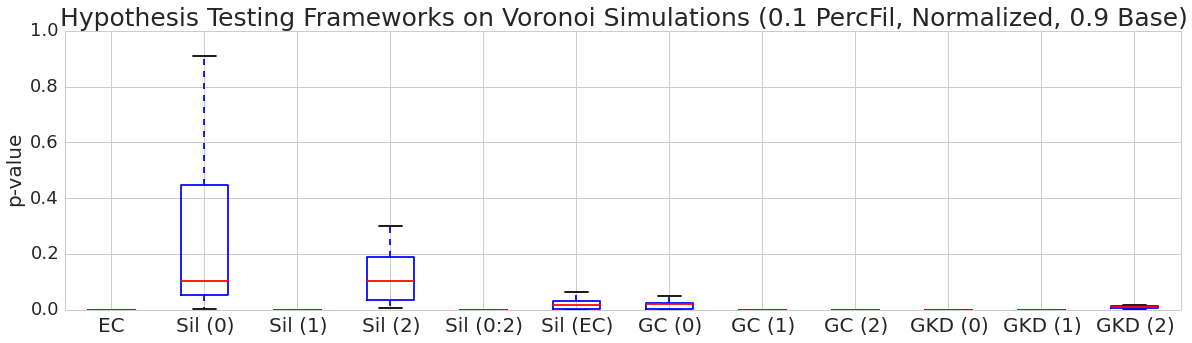

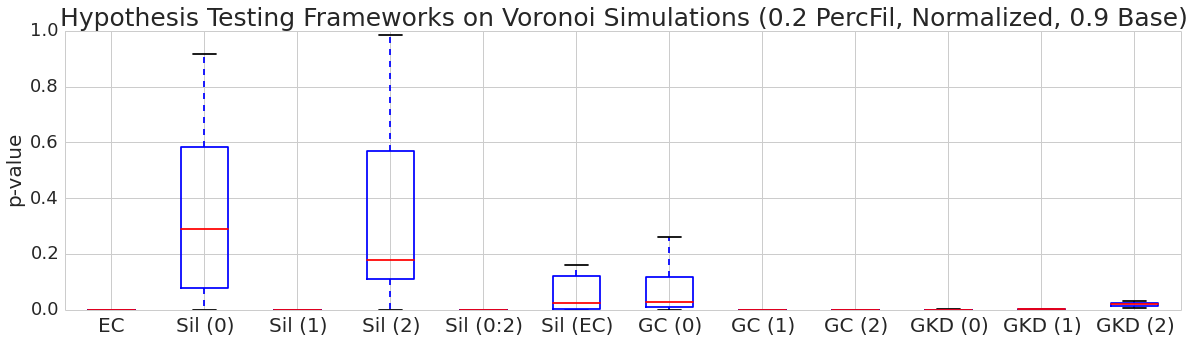

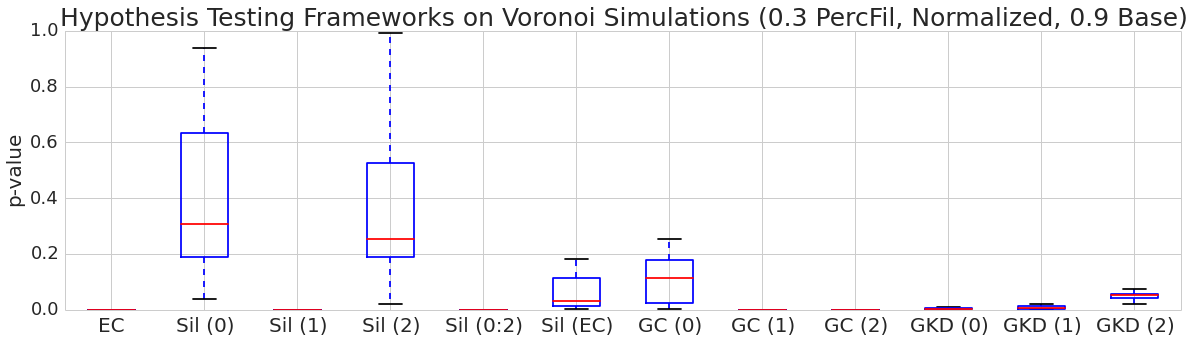

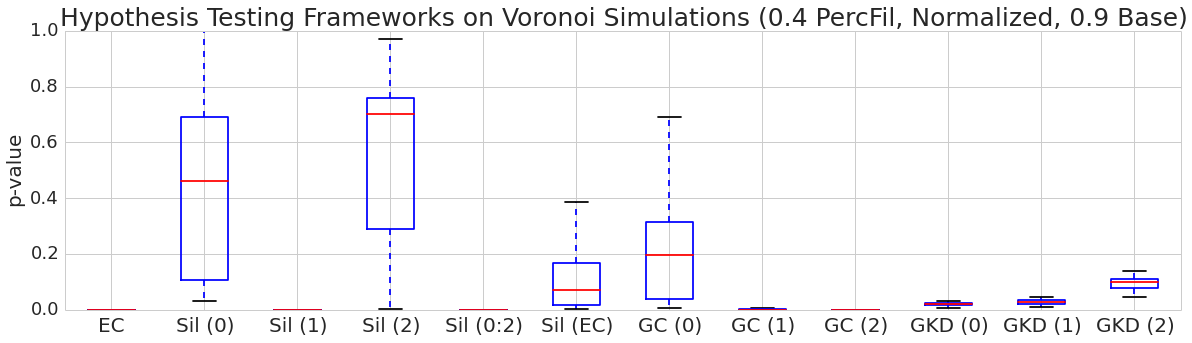

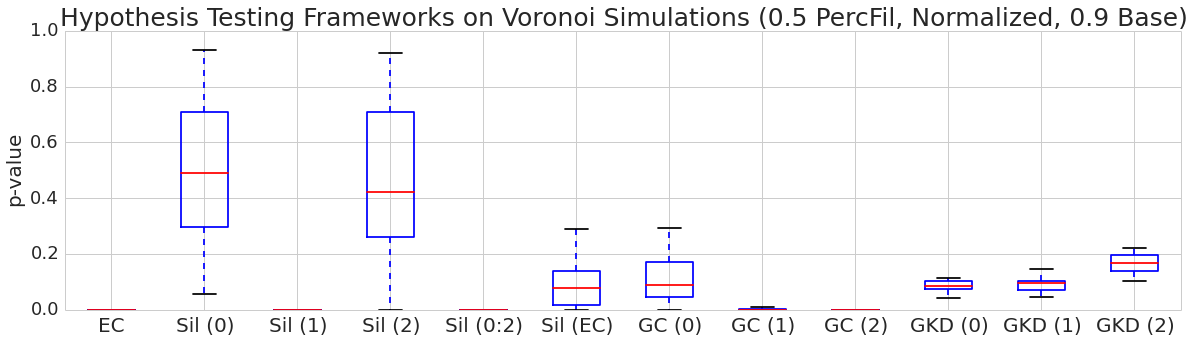

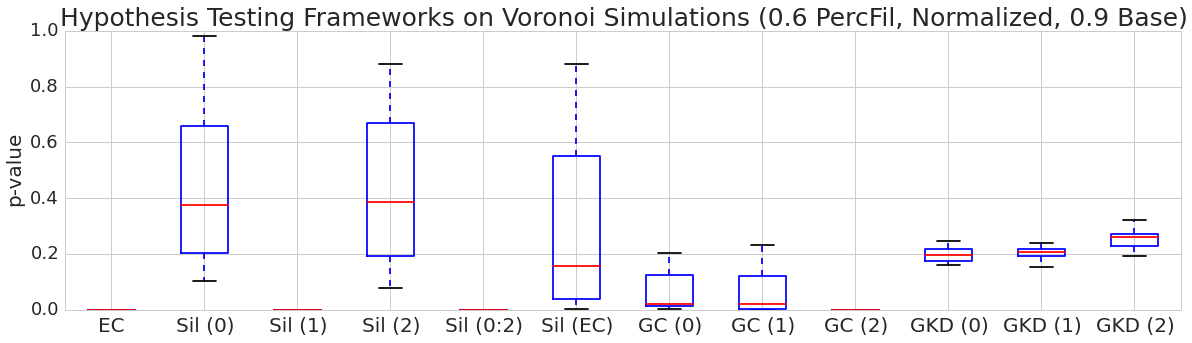

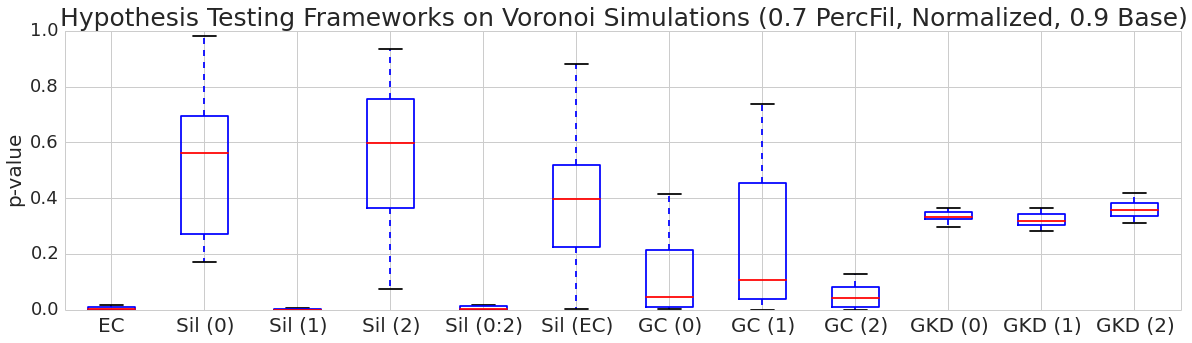

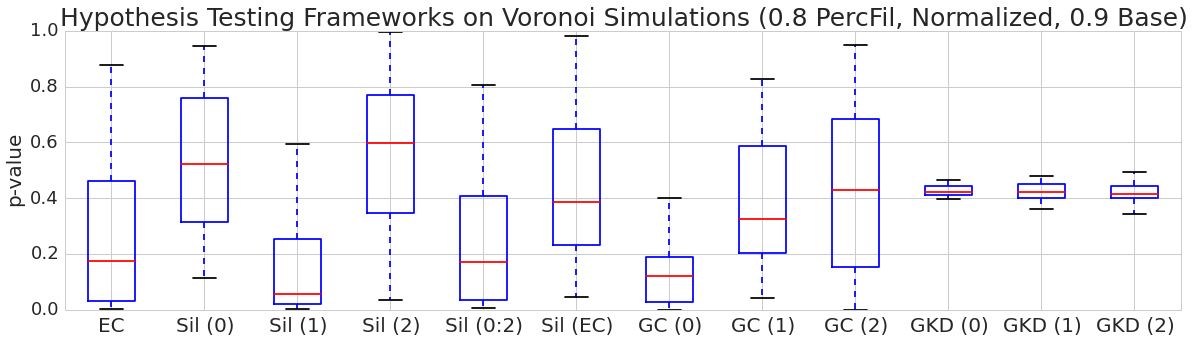

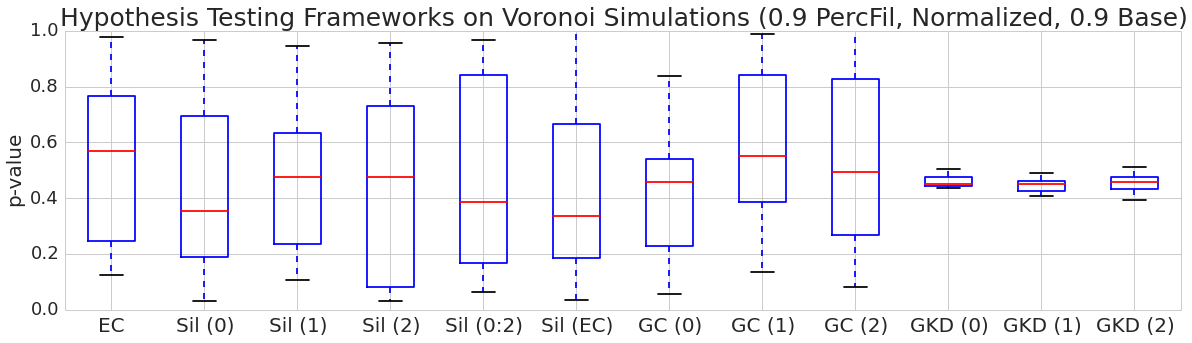

In [117]:
listofPercFil = [0, 1, 2, 3, 4, 5, 6, 7, 8]
actualPercFil = np.arange(0.1, 1, 0.1)
for percFil in listofPercFil:
    keyorder = ['euler', 'indiv_silh-dim-0', 'indiv_silh-dim-1', 'indiv_silh-dim-2',
                'all-silh', 'silh-euler', 'contour-dim-0', 'contour-dim-1', 'contour-dim-2', 
                'global-kde-dim-0', 'global-kde-dim-1', 'global-kde-dim-2'] 
    dataorder = [np.exp(bighash[i][percFil]) for i in keyorder]
    tickorder = ['EC', 'Sil (0)', 'Sil (1)', 'Sil (2)', 'Sil (0:2)', 'Sil (EC)', 'GC (0)', 
                 'GC (1)', 'GC (2)', 'GKD (0)', 'GKD (1)', 'GKD (2)'] 
    
    plt.figure(figsize=(20,5))
    matplotlib.rc('xtick', labelsize=18) 
    matplotlib.rc('ytick', labelsize=18)
    plt.title('Hypothesis Testing Frameworks on Voronoi Simulations (' + str(actualPercFil[percFil]) + ' PercFil, Normalized, 0.9 Base)', 
              fontsize=25)
    plt.ylabel('p-value', fontsize=20)
    plt.boxplot(dataorder)
    plt.xticks(np.arange(len(dataorder))+1, tickorder, fontsize=20)
#     plt.savefig("../saved_states/2_17_16/boxplot_percfil_norm_true_base_0.9_trial_" + str(actualPercFil[percFil]) + ".pdf")
    plt.show()

#### Do some plotting with just the Top 4: (All-Silh, Euler, Contour-dim-2, Global-dim-1)

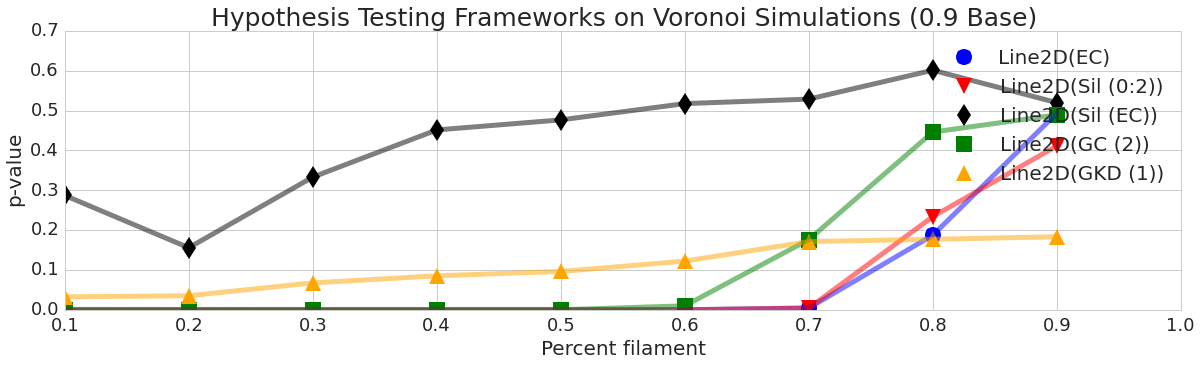

In [46]:
xvalues = np.arange(0.1, 1.0, 0.1)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
plt.figure(figsize=(20,5))
plt.title('Hypothesis Testing Frameworks on Voronoi Simulations (0.9 Base)', fontsize=25)
plt.ylabel('p-value', fontsize=20)
plt.xlabel('Percent filament', fontsize=20)

allkeys = ['euler', 'all-silh', 'silh-euler', 'contour-dim-2', 'global-kde-dim-1']
allticks = ['EC', 'Sil (0:2)', 'Sil (EC)', 'GC (2)', 'GKD (1)']
allcolors = ['b', 'r', 'k', 'g', 'orange']
allshapes = ['o', 'v', 'd', 's', '^']
allgraphs = []

for k, c, s, t in zip(allkeys, allcolors, allshapes, allticks):
    graph, = plt.plot(xvalues, [np.percentile(np.exp(i), 50) for i in bighash[k]], s, color=c, markersize=16, label=t)
    allgraphs.append(graph)
plt.legend(allgraphs, fontsize=20)

for k, c, s in zip(allkeys, allcolors, allshapes):
    _, plt.plot(xvalues, [np.percentile(np.exp(i), 50) for i in bighash[k]], color=c, markersize=30, alpha=0.5, linewidth=5.0)

# plt.savefig("../saved_states/2_17_16/lineplots/lineplot_norm_false_base_0.9.pdf")
plt.show()